In [53]:
#Importing packages I need on the basis of the Project Overview
import datetime as dt
import numpy as np
import pandas as pd
import json
import re
import requests
import tweepy
import matplotlib.pyplot as plt

# Gathering Data for this project

In [2]:
#First I upload the WeRateDogs Twitter archive as "twitter_archive"
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv", sep="," )


In [3]:
#The the image file as "image"
image = pd.read_csv("image-predictions.tsv", sep="\t" )

Here I add my consumer key, secret, access token and secret. But I remove this in my report as requested.

In [4]:
consumer_key = '1fCg1ehcr3Jzn6NjK3kVZykoY'
consumer_secret = 'Im7QlcfrSHd2DOFZweKACa1A5mKBhCmsB51zza2yS3GKx3RHgS'
access_token = '118333258-wtFimDy26OwXqtNvjoqOpt3C3n46ZbDrvSP7C0UY'
access_secret = 'Z6w92uaHqiMZviu8DQY8uhEp3CseGI4xYksq87OG0oBT8'

In [5]:
#I then authenticate through creating an OAuthHandler instance and set access
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)


In [6]:
#And I create an API to fetch the data, which I will call "api"
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=False)


In [7]:
#Then I make a list "list_of_tweets", which I will populate with the tweets from the api, 
# based tweet_id in the twitter_archive 
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets = []
for tweet_id in twitter_archive['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets.append(tweet_id)

In [8]:
#Then I isolate the json part that I have downloaded from this api and add this into a list called my_list
my_list = []
for each_json_tweet in list_of_tweets:
    my_list.append(each_json_tweet)

In [9]:
#and I put this list into a txt file:
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list, indent=4))

In [10]:
#Lastly, I make a dataframe from this textfile with the items I want to use in the next stage of this project
my_dump_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'Retweet'
            url = 'Retweet'

        my_dump_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(my_dump_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])

Then my task was to count each tweet's retweet and favorite ("like") and any additional data you find interesting. Then I should store each tweet's entire set of JSON data in a file called "tweet_json.txt"

# Assessing data

After gathering each of the above pieces of data, my task is to assess the data visually and programmatically for quality and tidiness issues. 
I need to detect and document at least eight (8) quality issues and two (2) tidiness issues.
Also, I need to assess the following issues:
1. You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
2. Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
3. Cleaning includes merging individual pieces of data according to the rules of tidy data.
4. The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
5. You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.
For this I am going to inspect the data I gathered in the previous step of this project.

In [11]:
#First I am inspecting the first 5 rows of my file I called 'archive'
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Some things I see here on data quality and data tidiness:

## 1. Data quality

The poor quality data has issues with its contents and can be seen in the form of missing values, inconsistent data, incorrect data types, and duplicates. 

a. Here I see a lot of NaN values in "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_used_id" and "retweeted_status_timestamp".

b. I don't want retweeted tweets at all so those need to be deleted.

c. I see "in reply to" as a column. This is data I don't need so this should be deleted as well.

## 2. Data tidiness


Data tidiness has nothing to do with the content of the data but looks at how the data is organised. Data is tidy if i) Each variable forms a column, ii) Each observation forms a row and iii) Each type of observational unit forms a table

a. I think that in the below, the various stages of dog (doggo, floofer, pupper and puppo) are actually one variable and should therefore form one column and not 4 different columns.

b. Further I think that the datestamp should be split in i) time and ii) date.

In [12]:
#Then I am retreiving the key data on this file
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In addition to what I already saw above, I now noted two more data quality issues: 

d. the expanded_urls column has some NaN values, and

e. tweet_id has an integer as a datatype, while it should be a string.

In [13]:
#Then I do the same for the file I called 'image'
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Some things I see here on data quality and data tidiness on this file then:

## 1. Data quality

a. Differing cases for the types of dogs

b. Unclear names of the columns (p1, p2 etc)

## 2. Data tidiness

I do not see anything particular on data tidiness in this table.

In [14]:
#And get some key data on the file
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In addition to what I already saw above, I now noted one more data quality issues: 

c. tweet_id has an integer as a datatype, while it should be a string.

In [15]:
#Almost last but definitely not least, I am inspecting the first 5 rows of the dataframe I created myself
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,685681090388975616,1953,116,9012055,17,Twitter for iPhone,Original tweet,️
1,685667379192414208,2255,534,9012055,17,Twitter for iPhone,Original tweet,https://t.co/u427woxFpJ
2,685663452032069632,3080,1387,9012055,17,Twitter for iPhone,Original tweet,https://t.co/AcVWe39nmM
3,685641971164143616,2787,725,9012055,17,Twitter for iPhone,Original tweet,https://t.co/jJS8qQeuNO
4,685547936038666240,31504,14775,9012055,17,Twitter for iPhone,Original tweet,https://t.co/3m6bNGXWnM


Some things I see here on data quality and data tidiness on this file then:

## 1. Data quality

a. Also here I see that there are quite some retweets, wich are duplicated and thus I do not want to have in the dataset that is the basis of my analysis

## 2. Data tidiness

I do not see anything particular on data tidiness in this table.

In [16]:
#As well as the key data in this file
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 8 columns):
tweet_id            750 non-null object
favorite_count      750 non-null int64
retweet_count       750 non-null int64
followers_count     750 non-null int64
friends_count       750 non-null int64
source              750 non-null object
retweeted_status    750 non-null object
url                 750 non-null object
dtypes: int64(4), object(4)
memory usage: 47.0+ KB


In addition to what I already saw above, I do not see anything particular on data tidiness in this table.

Let us then summarise the issues I identified

## Quality issues

a. Here I see a lot of NaN values in "twitter_archive"

b. I don't want retweeted tweets at all so those need to be deleted from "twitter_archive", "image" and "tweet_json"

c. I don't need any replies to other tweets so these should be deleted from "twitter_archive", "image" and "tweet_json"

d. tweet_id has an integer as a datatype, while it should be a string in "twitter_archive"

e. Differing cases for the types of dogs in "images"

f. Unclear names of the columns (p1, p2 etc) in "images"

g. Our dataset includes tweets without image, which should be dropped

h. tweet_id has an integer as a datatype, while it should be a string in "image"



## Data tidiness issues

a. The various stages of dog (doggo, floofer, pupper and puppo) are actually one variable and should therefore form one column and not 4 different columns for "twitter_archive".

b. The datestamp should be split in i) time and ii) date for "twitter_archive".

# Clean

Now my task is to clean each of the issues I documented. Note that I run quite some tests in between (through sample, describe, tail and head - just to check if what I am doing works as expected), but I removed those tests for readibility.

In [17]:
#First I will create copies of my dataframes so I can clean them but leave the original ones intact
twitter_archive_clean = twitter_archive.copy()
image_clean = image.copy()
tweet_json_clean = tweet_json.copy()

In [18]:
#Then I will remove the columns that have so many NaN values, being most notably:
#in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
#I have checked that I do not lose the data on retweets as I have this in the tweet_jason file I created as well
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],
                                                   axis=1)

In [19]:
#Then I am going to create a new list based on the tweet_jason file, for all tweets that are retweets
list_of_retweets = tweet_json[tweet_json['retweeted_status'] == "Retweet" ]['tweet_id'].tolist()

In [20]:
#Then if the tweet ID of these tweets is in twitter_archive, I am dropping these
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean.tweet_id.isin(list_of_retweets)]


In [21]:
#And I do the same for image_clean
image_clean = image_clean[~image_clean.tweet_id.isin(list_of_retweets)]

In [22]:
#And for tweet_jason
tweet_json_clean = tweet_json_clean[~tweet_json_clean.tweet_id.isin(list_of_retweets)]

In [23]:
#Then I am going to make a list of replies for the same purpose
list_of_replies = twitter_archive[twitter_archive['in_reply_to_status_id'].notnull()]['tweet_id'].tolist()

In [24]:
#Then if the tweet ID of these tweets is twitter_archive, I am dropping these
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean.tweet_id.isin(list_of_replies)]

In [25]:
#And I do the same for image_clean
image_clean = image_clean[~image_clean.tweet_id.isin(list_of_replies)]

In [26]:
#And for tweet_jason
tweet_json_clean = tweet_json_clean[~tweet_json_clean.tweet_id.isin(list_of_replies)]

In [27]:
#The next issue I am fixing is changing the tweet_id into a string for twitter_archive
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype('str')

In [28]:
#And then the differing cases for the types of dogs in "images"
#Lets use the "title" method for that 
image_clean['p1'] = image_clean['p2'].str.title()
image_clean['p2'] = image_clean['p2'].str.title()
image_clean['p3'] = image_clean['p3'].str.title()

In [29]:
#Next is the unclear names of the columns (p1, p2 etc) in "images"
#I understand that p1 stands for First prefiction, where p2 is second and p3 is third
image_clean = image_clean.rename(columns={'p1': 'first_prediction', 
                                          'p1_conf': 'first_pred_conf', 
                                          'p2': 'second_prediction', 
                                          'p2_conf': 'second_pred_conf',
                                          'p3': 'third_prediction',
                                          'p3_conf': 'third_pred_conf',
                                          'p1_dog': 'is_dog_first_pred',
                                          'p2_dog': 'is_dog_sec_pred',
                                          'p3_dog': 'is_dog_third_pred'
                                         })

In [30]:
#Then I am going to remove all tweets that do not have images from the twitter_archive and tweet_jason
#So basically all tweets that are not in my image dataframe
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean.tweet_id.isin(image_clean)]
tweet_json_clean = tweet_json_clean[~tweet_json_clean.tweet_id.isin(image_clean)]

In [31]:
#The last issue on my data quality was that tweet_id has an integer as a datatype for the image dataframe
image_clean['tweet_id'] = image_clean['tweet_id'].astype('str')

In [32]:
#Then I want to combine the various stages of a dog (doggo, floofer, pupper and puppo) into  one column in "twitter_archive".
#First I am removing the word "None" with a space
twitter_archive_clean['doggo'].replace('None', '', inplace=True)
twitter_archive_clean['floofer'].replace('None', '', inplace=True)
twitter_archive_clean['pupper'].replace('None', '', inplace=True)
twitter_archive_clean['puppo'].replace('None', '', inplace=True)

In [33]:
#Then I want to add a column that is called "stage", where the info of this previously 4 columns is combined
twitter_archive_clean['stage'] = (twitter_archive_clean['doggo'] + 
                                    twitter_archive_clean['floofer'] + 
                                    twitter_archive_clean['pupper'] + 
                                    twitter_archive_clean['puppo'])

In [34]:
#If I review my dataframe then I see that there are quite some dogs that do not have a stage, so I add one variable "Unknown" for those
twitter_archive_clean['stage'].replace('', 'unknown', inplace=True)

In [35]:
#And then I can remove the old 4 columns
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)


In [36]:
#Last but not least: The datestamp should be split in i) time and ii) date for "twitter_archive".
#First I make sure that pandas recognises it as date-time formated data
twitter_archive_clean['timestamp'] = pd.DatetimeIndex(twitter_archive_clean['timestamp'])


In [37]:
#Then I think for my analysis I only want the date, as I do not know where everybody is coming from the times are not saying so much anyway
#To do that, I create a new variable called "date"
twitter_archive_clean['date'] = pd.DatetimeIndex(twitter_archive_clean['timestamp']).date


In [38]:
#And I drop the timestamp
twitter_archive_clean = twitter_archive_clean.drop(['timestamp'], axis=1)


# Storing, Analyzing, and Visualizing Data for this Project

Now my task is to store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv. Then, I am to analyze and visualize my wrangled data in your wrangle_act.ipynb Jupyter Notebook with at least three (3) insights and one (1) visualization.

In [39]:
#We start with the saving. First I merge my two datasets
twitter_archive_master = pd.merge(twitter_archive_clean, image_clean, on='tweet_id', how='left')

In [40]:
#Then this merged dataframe should be saved as an csv as per the instrumction
twitter_archive_master.to_csv('twitter_archive_master.csv')


Then my insights and visualisation.
I wonder what source of the tweets is most popular (I seem to see iPhone a lot), then I also wonder which dog "stage" gets the highest rates (is it true that dogs are cutest as a baby?). I think I am going to visualise the rhid insight I am presenting: is there a relationship between number of likes and retweets - I can imagine that one either likes or retweets, but it can be also that if something is really nice, one tends to do both.

In [41]:
#The amount of tweets per source can be counted as follows
twitter_archive_master['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2143
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

So a first insight is that Twitter for iPhone is by far the most popular source under the tweeps using WeRateDogs. 2143 tweets with that source, copared to 91, 31 and 11 for the other sources.

In [52]:
#I am going to look at the means of my data for each of the stages:
twitter_archive_master.groupby("stage").mean()

,rating_numerator,rating_denominator,img_num,first_pred_conf,second_pred_conf,third_pred_conf
stage,,,,,,
doggo,11.875000,10.000000,1.313433,0.581910,0.159575,0.060745
doggofloofer,11.000000,10.000000,1.000000,0.354733,0.177538,0.131706
doggopupper,11.272727,10.000000,1.100000,0.839366,0.082442,0.027861
doggopuppo,13.000000,10.000000,1.000000,0.321676,0.115138,0.096100
floofer,11.888889,10.000000,1.142857,0.609204,0.155319,0.047997
pupper,10.851240,10.000000,1.253589,0.603162,0.130720,0.056277
puppo,12.071429,10.000000,1.434783,0.721344,0.140264,0.043497
unknown,12.372899,10.494748,1.190531,0.591380,0.134563,0.061171


So if a dog is classified as a doggo and a puppo, this would lead to the highest rating. The lowest would be a pupper.

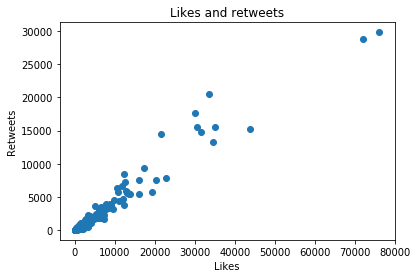

In [60]:
#My third insight is the relationship between likes and retweets
plt.scatter(tweet_json["favorite_count"], tweet_json["retweet_count"])
plt.title("Likes and retweets")
plt.xlabel("Likes")
plt.ylabel("Retweets")
plt.show()

So its not "either or" - apparently the more likes you get, the bigger the chance to be retweeted. There is a strong positive relationship.